## Imports

In [1]:
# Code modules
from mp4_code import *

import numpy as np
import pandas as pd

# Visualization libraries
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# sklearn for machine learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import model_selection

## Wordcloud to visualize the usage of words in our trustpilot reviews.

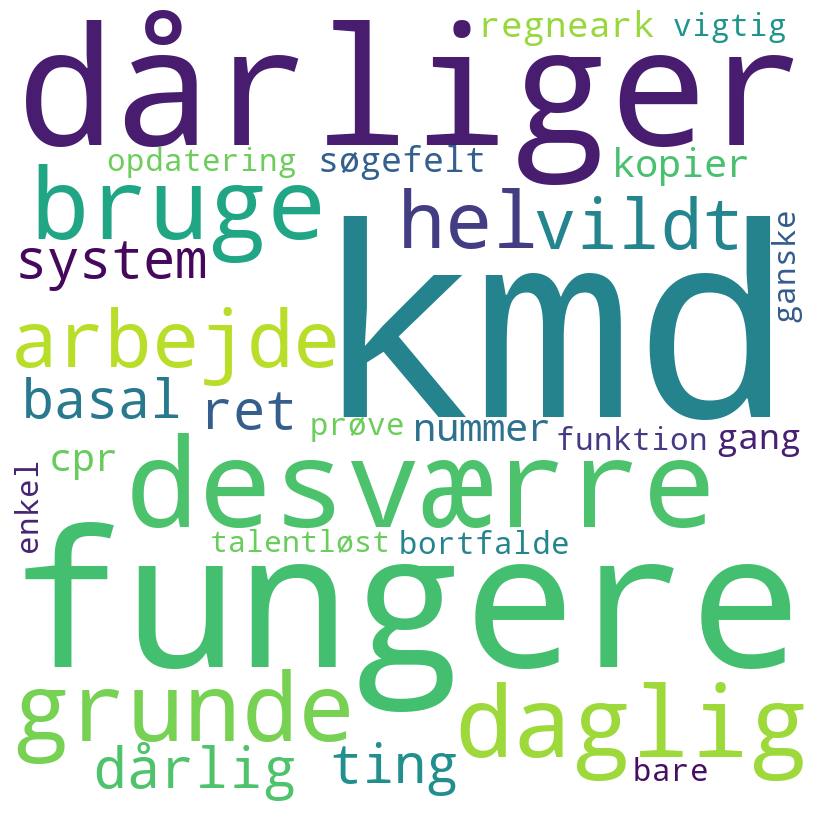

In [2]:
reviews = get_reviews("https://dk.trustpilot.com/review/www.kmd.dk")

tokens = preprocess_text(reviews[1])
text = ' '.join(tokens)
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()

## Decision Tree graph

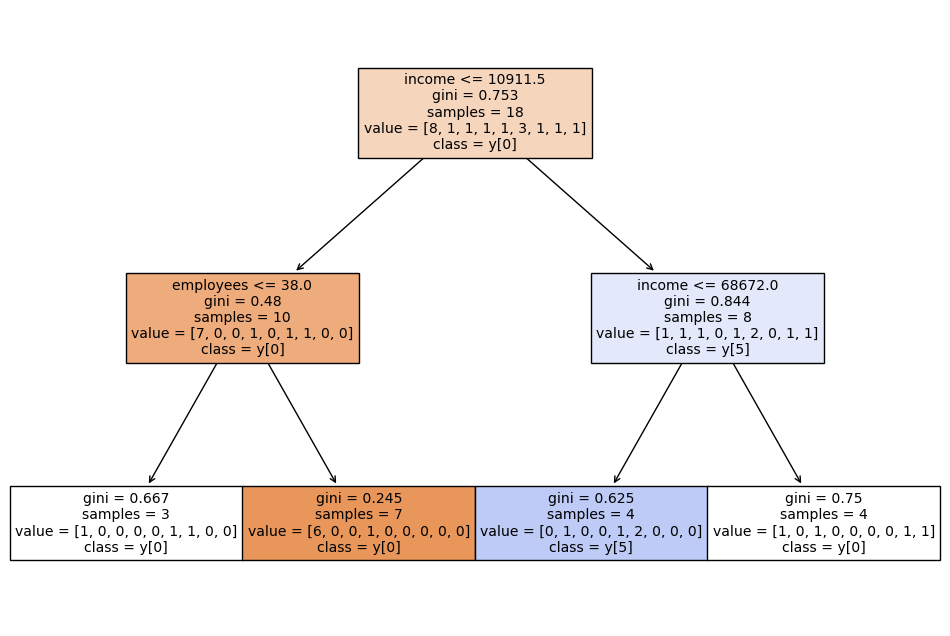

In [3]:
small_company_df = pd.read_csv('../data/companies_municipalities.csv')
numeric_cols = small_company_df.select_dtypes(include=['number']).columns
df_numeric = small_company_df[numeric_cols]

array = df_numeric.values
X, y = array[:, :-1], array[:, -1]
set_prop = 0.2
seed = 2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)
params = {'max_depth': 2}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=numeric_cols[:-1], class_names=True)
plt.show()

## Pie chart visualizing the distribution of trustpilot reviews based on polarity score

In [ ]:
reviews = reviews_classification()
print(reviews)

counts = {"positive": 0, "negative": 0, "neutral": 0}
for review in reviews:
    classification = classify_review(review)
    counts[classification] += 1


# Create a pie chart to show the distribution of positive, negative, and neutral reviews
labels = ["Positive", "Negative", "Neutral"]
sizes = [counts["positive"], counts["negative"], counts["neutral"]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Sentiment Analysis of Reviews")
plt.show()
